**MY CNN MODEL**

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Dataset
# -----------------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/train",          # path to training folder
    image_size=(64, 64),   # resize all images
    batch_size=32,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/val",            # path to validation folder
    image_size=(64, 64),
    batch_size=32,
    shuffle=False
)

# Class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# -----------------------------
# 2. Data Pipeline (Normalize + Augment)
# -----------------------------
normalization_layer = layers.Rescaling(1./255)


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds
    # Removed resizing: .map(lambda x, y: (resize_layer(x), y))
    .map(lambda x, y: (normalization_layer(x), y))
    .map(lambda x, y: (data_augmentation(x), y))
    .cache()
    .shuffle(1000)
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds
    # Removed resizing: .map(lambda x, y: (resize_layer(x), y))
    .map(lambda x, y: (normalization_layer(x), y))
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

# -----------------------------
# 3. Build Model
# -----------------------------
def create_simple_cnn(input_shape=(64, 64, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),


        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),


        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # labels are integers
                  metrics=['accuracy'])
    return model

model = create_simple_cnn(input_shape=(64, 64, 3), num_classes=num_classes)
model.summary()

Found 6275 files belonging to 11 classes.
Found 1102 files belonging to 11 classes.
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,027 (2.62 MB)

 Trainable params: 685,323 (2.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 136s 456ms/step - accuracy: 0.4120 - loss: 1.9754 - val_accuracy: 0.0953 - val_loss: 6.7825
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 83s 422ms/step - accuracy: 0.7186 - loss: 0.8403 - val_accuracy: 0.1561 - val_loss: 4.8090
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 88s 446ms/step - accuracy: 0.7794 - loss: 0.6451 - val_accuracy: 0.4755 - val_loss: 1.4733
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 86s 436ms/step - accuracy: 0.8533 - loss: 0.4440 - val_accuracy: 0.7659 - val_loss: 0.6659
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 87s 444ms/step - accuracy: 0.8917 - loss: 0.3338 - val_accuracy: 0.8131 - val_loss: 0.5148
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 139s 428ms/step - accuracy: 0.9254 - loss: 0.2408 - val_accuracy: 0.7722 - val_loss: 0.7395
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 82s 415ms/step - accuracy: 0.9244 - loss: 0.2192 - val_accuracy: 0.4936 - val_loss: 2.5010
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 87s 439ms/step - accuracy: 0.9405 - loss:

In [17]:
import pickle

# After each model.fit(...)
with open("history_MyCNN.pkl", "wb") as f:
    pickle.dump(history.history, f)


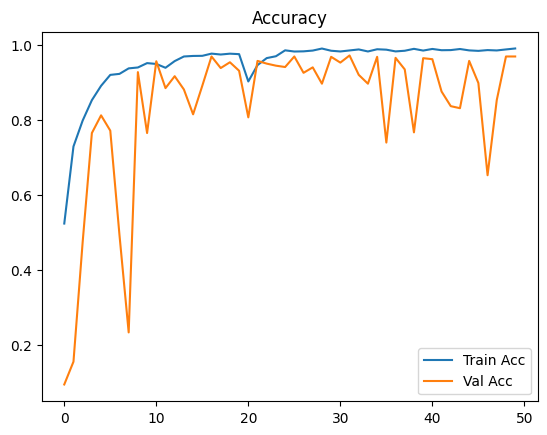

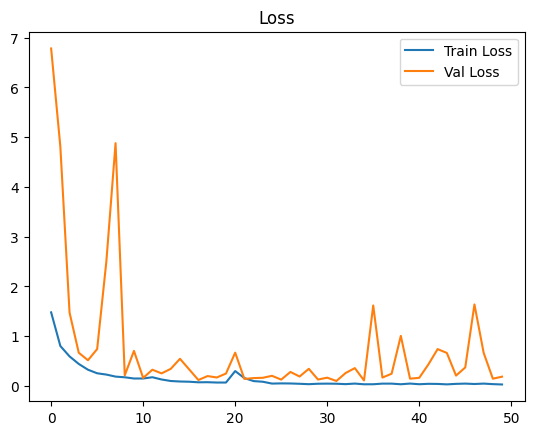

In [9]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
import torch
torch.save(model, "model.pth")

In [ ]:
model

<Sequential name=sequential_13, built=True>

In [ ]:
Model: "sequential_1"

In [10]:
model.save("my_cnn_model.h5")

In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Folder containing images
folder_path = "/content/drive/MyDrive/Computer_Vision/data/train/fish sea_food shrimp"   # e.g. "data/test_images"
img_size = (64, 64)

predictions = []

for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension

    # Predict
    pred_probs = model.predict(img_array, verbose=0)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    class_name = class_names[pred_class]

    predictions.append((img_name, class_name, pred_probs[0][pred_class]))

# Show results
for img_name, pred_class, confidence in predictions:
    print(f"{img_name} -> {pred_class} ({confidence:.2f})")


AOQUUP5P0BA9.jpg -> fish sea_food shrimp (1.00)
WRQ4SO8VYQVT.jpg -> fish sea_food shrimp (1.00)
JY1AJPXTOGW0.jpg -> fish sea_food shrimp (0.99)
MYPBH3I1QBGL.jpg -> fish sea_food shrimp (1.00)
2BF0GKV64GUE.jpg -> fish sea_food shrimp (1.00)
QRB7RG2W4T57.jpg -> fish sea_food shrimp (0.99)
FW7YJYTGVNBC.jpg -> fish sea_food striped_red_mullet (0.59)
BJFAJU55ULXZ.jpg -> fish sea_food shrimp (1.00)
7SEAVAF17DC4.jpg -> fish sea_food shrimp (1.00)
OJ0RH634B6TD.jpg -> fish sea_food shrimp (1.00)
NJTNLOM8K79Q.jpg -> fish sea_food shrimp (1.00)
KTZGVW48DSJL.jpg -> fish sea_food striped_red_mullet (0.51)
D18ZQ9M84RHA.jpg -> fish sea_food shrimp (1.00)
GUWTKKZO1ERS.jpg -> fish sea_food shrimp (0.97)
J9QY7ZLKFCKK.jpg -> fish sea_food shrimp (0.98)
FHICX6XUD9LK.jpg -> fish sea_food striped_red_mullet (0.62)
WMGLUIVLYXBS.jpg -> fish sea_food shrimp (0.98)
VX4PNHLFUB5Q.jpg -> fish sea_food shrimp (1.00)
EX8OPG78BGTH.jpg -> fish sea_food shrimp (1.00)
C8XCWNT1C891.jpg -> fish sea_food shrimp (1.00)
MOT8

**MOBILENET**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
import os

# =========================================================
# 1. Load Dataset (train / val)
# =========================================================
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/train",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/val",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# =========================================================
# 2. Preprocessing Pipeline (Augmentation + Normalization)
# =========================================================
normalization_layer = layers.Rescaling(1./255)

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds
    .map(lambda x, y: (normalization_layer(x), y))
    .map(lambda x, y: (data_augmentation(x), y))
    .cache()
    .shuffle(1000)
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds
    .map(lambda x, y: (normalization_layer(x), y))
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)



Found 6275 files belonging to 11 classes.
Found 1102 files belonging to 11 classes.
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
# =========================================================
# 3. Build MobileNetV2 Fine-tuned Model
# =========================================================
def create_finetuned_model(input_shape=(224, 224, 3), num_classes=10):
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = False  # freeze initially

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = create_finetuned_model(input_shape=(224, 224, 3), num_classes=num_classes)
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,371 (9.24 MB)

 Trainable params: 165,387 (646.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# =========================================================
# 4. Train (feature extraction stage)
# =========================================================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 1332s 2s/step - accuracy: 0.6160 - loss: 1.1955 - val_accuracy: 0.9555 - val_loss: 0.1605
Epoch 2/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9273 - loss: 0.2283 - val_accuracy: 0.9755 - val_loss: 0.0879
Epoch 3/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.9582 - loss: 0.1410 - val_accuracy: 0.9773 - val_loss: 0.0664
Epoch 4/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9715 - loss: 0.1001 - val_accuracy: 0.9819 - val_loss: 0.0555
Epoch 5/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9741 - loss: 0.0812 - val_accuracy: 0.9846 - val_loss: 0.0462
Epoch 6/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9830 - loss: 0.0586 - val_accuracy: 0.9819 - val_loss: 0.0501
Epoch 7/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.9848 - loss: 0.0481 - val_accuracy: 0.9846 - val_loss: 0.0477
Epoch 8/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.9837 - loss: 0.0441 - val_acc

In [ ]:
# =========================================================
# 5. Fine-tune (unfreeze base model)
# =========================================================
model.layers[0].trainable = True  # unfreeze MobileNetV2

# Optional: freeze first N layers if needed
# for layer in model.layers[0].layers[:100]:
#     layer.trainable = False

from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1294s 6s/step - accuracy: 0.4016 - loss: 11.3092 - val_accuracy: 0.9809 - val_loss: 0.1667
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1309s 7s/step - accuracy: 0.9293 - loss: 0.2586 - val_accuracy: 0.9800 - val_loss: 0.1346
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1306s 6s/step - accuracy: 0.9512 - loss: 0.1468 - val_accuracy: 0.9782 - val_loss: 0.1028
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1245s 6s/step - accuracy: 0.9706 - loss: 0.0962 - val_accuracy: 0.9809 - val_loss: 0.0870
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1249s 6s/step - accuracy: 0.9824 - loss: 0.0600 - val_accuracy: 0.9773 - val_loss: 0.0806
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1291s 6s/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0.9819 - val_loss: 0.0690
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1283s 6s/step - accuracy: 0.9919 - loss: 0.0289 - val_accuracy: 0.9846 - val_loss: 0.0597
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1276s 6s/step - accuracy: 0.9928 - loss: 0.0228 -

In [23]:
import pickle

# After each model.fit(...)
with open("history_MobileNet.pkl", "wb") as f:
    pickle.dump(history.history, f)


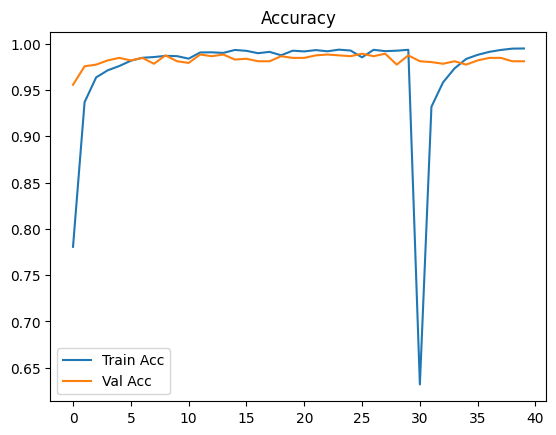

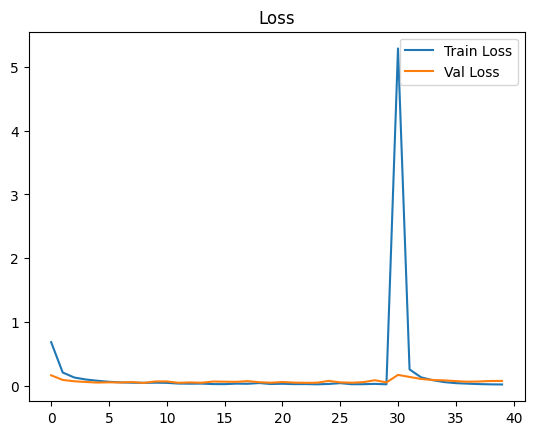

In [ ]:
# =========================================================
# 6. Plot Training History
# =========================================================
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
model.save("my_MobileNet_model.h5")

In [ ]:
model

<Sequential name=sequential_1, built=True>

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers

def create_finetuned_model(input_shape=(224, 224, 3), num_classes=10):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [ ]:
model = create_finetuned_model((224,224,3), num_classes)
model.fit(train_ds, validation_data=val_ds, epochs=30)
model.save("my_MobileNet_model.h5")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.5976 - loss: 1.2508 - val_accuracy: 0.9510 - val_loss: 0.1855
Epoch 2/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.9261 - loss: 0.2455 - val_accuracy: 0.9637 - val_loss: 0.1019
Epoch 3/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.9528 - loss: 0.1555 - val_accuracy: 0.9782 - val_loss: 0.0650
Epoch 4/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.9701 - loss: 0.1036 - val_accuracy: 0.9764 - val_loss: 0.0652
Epoch 5/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9703 - loss: 0.0864 - val_accuracy: 0.9710 - val_loss: 0.0816
Epoch 6/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9797 - loss: 0.0683 - val_accuracy: 0.9837 - val_loss: 0.0470
Epoch 7/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.9795 - loss: 0.0669 - val_accuracy: 0.9819 - val_loss: 0.0651
Epoch 8/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Folder containing images
folder_path = "/content/drive/MyDrive/Computer_Vision/data/train/fish sea_food shrimp"   # e.g. "data/test_images"
img_size = (224, 224) # Corrected image size

predictions = []

for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension

    # Predict
    pred_probs = model.predict(img_array, verbose=0)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    class_name = class_names[pred_class]

    predictions.append((img_name, class_name, pred_probs[0][pred_class]))

# Show results
for img_name, pred_class, confidence in predictions:
    print(f"{img_name} -> {pred_class} ({confidence:.2f})")

AOQUUP5P0BA9.jpg -> fish sea_food shrimp (1.00)
WRQ4SO8VYQVT.jpg -> fish sea_food shrimp (1.00)
JY1AJPXTOGW0.jpg -> fish sea_food shrimp (1.00)
MYPBH3I1QBGL.jpg -> fish sea_food shrimp (1.00)
2BF0GKV64GUE.jpg -> fish sea_food shrimp (1.00)
QRB7RG2W4T57.jpg -> fish sea_food shrimp (1.00)
FW7YJYTGVNBC.jpg -> fish sea_food shrimp (1.00)
BJFAJU55ULXZ.jpg -> fish sea_food shrimp (1.00)
7SEAVAF17DC4.jpg -> fish sea_food shrimp (1.00)
OJ0RH634B6TD.jpg -> fish sea_food shrimp (1.00)
NJTNLOM8K79Q.jpg -> fish sea_food shrimp (1.00)
KTZGVW48DSJL.jpg -> fish sea_food shrimp (1.00)
D18ZQ9M84RHA.jpg -> fish sea_food shrimp (1.00)
GUWTKKZO1ERS.jpg -> fish sea_food shrimp (1.00)
J9QY7ZLKFCKK.jpg -> fish sea_food shrimp (1.00)
FHICX6XUD9LK.jpg -> fish sea_food shrimp (1.00)
WMGLUIVLYXBS.jpg -> fish sea_food shrimp (1.00)
VX4PNHLFUB5Q.jpg -> fish sea_food shrimp (1.00)
EX8OPG78BGTH.jpg -> fish sea_food shrimp (1.00)
C8XCWNT1C891.jpg -> fish sea_food shrimp (1.00)
MOT86MMM2LRG.jpg -> fish sea_food shrimp

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Folder containing images
folder_path = "/content/drive/MyDrive/Computer_Vision/data/test/animal fish"   # e.g. "data/test_images"
img_size = (224, 224) # Corrected image size

predictions = []

for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension

    # Predict
    pred_probs = model.predict(img_array, verbose=0)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    class_name = class_names[pred_class]

    predictions.append((img_name, class_name, pred_probs[0][pred_class]))

# Show results
for img_name, pred_class, confidence in predictions:
    print(f"{img_name} -> {pred_class} ({confidence:.2f})")

QW7N1VRZKZUN.jpg -> animal fish (1.00)
EHIKMIS2ZYQB.jpg -> animal fish (1.00)
M20GWDEK6F0E.jpg -> animal fish (1.00)
8CYAQ2PNUUHT.jpg -> animal fish (1.00)
XDWL6SDIFHXJ.jpg -> animal fish (1.00)
0NBI29HSVDH5.jpg -> animal fish (1.00)
KVRD8TUVJ74M.jpg -> animal fish (1.00)
KW4RNJODS6MA.jpg -> animal fish (1.00)
1S8V884XUR9I.jpg -> animal fish (1.00)
H3TUIIWWW43L.jpg -> animal fish (1.00)
FQB3BN2YCYE7.jpg -> animal fish (1.00)
7Q3BJTW538VO.jpg -> animal fish (1.00)
COOZ3M72RTBJ.jpg -> animal fish (1.00)
N4E0CRU2159I.jpg -> animal fish (1.00)
251VC17RLJSK.jpg -> animal fish (1.00)
7UB3E35JQPIY.jpg -> animal fish (1.00)
62MW9Z31IX0Z.jpg -> animal fish (1.00)
QB9M2YQ46MDC.jpg -> animal fish (1.00)
HHSUV33Y1M07.jpg -> animal fish (0.95)
QRDWPANAPRH1.jpg -> animal fish (1.00)
8R8S5L6SOEXB.jpg -> animal fish (1.00)
E5YHEXLR2INK.jpg -> animal fish (1.00)
LRZIYNQ2JRK0.jpg -> animal fish (1.00)
QJQJW4EWBEHP.jpg -> animal fish (1.00)
7ILHHDB92PY5.jpg -> animal fish (1.00)
GOIJHS30CGVT.jpg -> anima

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier head
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # <-- change 3 to number of your classes

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Example data generator (adjust paths)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train
model.fit(train_gen, validation_data=val_gen, epochs=10)

# Save the model
model.save("my_VGG16_model.h5")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5024 images belonging to 11 classes.
Found 217 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2903s 18s/step - accuracy: 0.4801 - loss: 1.5696 - val_accuracy: 0.9124 - val_loss: 0.3987
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2823s 18s/step - accuracy: 0.8822 - loss: 0.4373 - val_accuracy: 0.9493 - val_loss: 0.2231
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2790s 18s/step - accuracy: 0.9513 - loss: 0.2243 - val_accuracy: 0.9816 - val_loss: 0.1369
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2792s 18s/step - accuracy: 0.9700 - loss: 0.1551 - val_accuracy: 0.9770 - val_loss: 0.1123
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2801s 18s/step - accuracy: 0.9802 - loss: 0.1082 - val_accuracy: 0.9816 - val_loss: 0.0913
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2822s 18s/step - accuracy: 0.9875 - loss: 0.0761 - val_accuracy: 0.9677 - val_loss: 0.0937
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2787s 18s/step - accuracy: 0.9896 - loss: 0.0598 - val_accuracy: 0.9724 - val_loss: 0.0685
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2811s 18s/step - accuracy: 0.9926 - loss: 0

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load saved model
model = load_model("my_VGG16_model.h5")

# Image size for VGG16
img_size = (224, 224)

# Get class names from training generator if available
# class_names = list(train_gen.class_indices.keys())
class_names = ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']  # <-- replace with your real class names

# Path to your image
img_path = "/content/drive/MyDrive/Computer_Vision/data/test/fish sea_food shrimp/1GWZ1J7833HW.jpg"

# Load and preprocess
img = image.load_img(img_path, target_size=img_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # <-- because we used rescale=1./255 during training

# Predict
preds = model.predict(x, verbose=0)
predicted_index = np.argmax(preds)
predicted_class = class_names[predicted_index]
confidence = preds[0][predicted_index] * 100

print(f"Predicted: {predicted_class} ({confidence:.2f}%)")


Predicted: fish sea_food shrimp (99.77%)


**ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(11, activation='softmax')(x)  # <-- change 3 to your number of classes

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Example data generators (adjust your dataset path)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Computer_Vision/data/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train model
model.fit(train_gen, validation_data=val_gen, epochs=10)

# Save model
model.save("my_ResNet50_model.h5")

Found 5024 images belonging to 11 classes.
Found 217 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 992s 6s/step - accuracy: 0.1198 - loss: 2.5381 - val_accuracy: 0.1705 - val_loss: 2.2665
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 932s 6s/step - accuracy: 0.1749 - loss: 2.2874 - val_accuracy: 0.1705 - val_loss: 2.2266
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 884s 6s/step - accuracy: 0.1931 - loss: 2.2282 - val_accuracy: 0.1659 - val_loss: 2.1986
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 871s 6s/step - accuracy: 0.2040 - loss: 2.1755 - val_accuracy: 0.2258 - val_loss: 2.1738
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 870s 6s/step - accuracy: 0.2249 - loss: 2.1597 - val_accuracy: 0.2258 - val_loss: 2.1380
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 925s 6s/step - accuracy: 0.2288 - loss: 2.1372 - val_accuracy: 0.2258 - val_loss: 2.1229
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 870s 6s/step - accuracy: 0.2624 - loss: 2.0844 - val_accuracy: 0.2258 - val_loss: 2.0944
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 878s 6s/step - accuracy: 0.2610 - loss: 2.0662 - val_accu

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load saved ResNet50 model
model = load_model("/content/my_ResNet50_model.h5")

# Image size
img_size = (224, 224)

# Class names (in the same order as your training data)
# class_names = list(train_gen.class_indices.keys())
class_names = ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']  # <-- replace with your real class names

# Path to single test image
img_path = "/content/drive/MyDrive/Computer_Vision/data/test/fish sea_food shrimp/1GWZ1J7833HW.jpg"

# Load and preprocess image
img = image.load_img(img_path, target_size=img_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # same as rescale=1./255 during training

# Predict
preds = model.predict(x, verbose=0)
pred_index = np.argmax(preds)
predicted_class = class_names[pred_index]
confidence = preds[0][pred_index] * 100

print(f"Predicted: {predicted_class} ({confidence:.2f}%)")


Predicted: fish sea_food striped_red_mullet (15.31%)


**InceptionV3**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Paths
train_dir = "/content/drive/MyDrive/Computer_Vision/data/train"
val_dir = "/content/drive/MyDrive/Computer_Vision/data/val"

# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Build InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# Save model
model.save("my_InceptionV3_model.h5")
print("✅ Model saved as my_InceptionV3_model.h5")


Found 6275 images belonging to 11 classes.
Found 1102 images belonging to 11 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1225s 6s/step - accuracy: 0.6851 - loss: 0.9640 - val_accuracy: 0.9410 - val_loss: 0.2151
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 904s 5s/step - accuracy: 0.9076 - loss: 0.2696 - val_accuracy: 0.9519 - val_loss: 0.1418
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 922s 5s/step - accuracy: 0.9338 - loss: 0.1914 - val_accuracy: 0.9746 - val_loss: 0.0854
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 911s 5s/step - accuracy: 0.9524 - loss: 0.1453 - val_accuracy: 0.9619 - val_loss: 0.0953
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 923s 5s/step - accuracy: 0.9584 - loss: 0.1135 - val_accuracy: 0.9701 - val_loss: 0.0844
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 892s 5s/step - accuracy: 0.9586 - loss: 0.1143 - val_accuracy: 0.9701 - val_loss: 0.0722
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 925s 5s/step - accuracy: 0.9685 - loss: 0.0944 -

✅ Model saved as my_InceptionV3_model.h5


In [19]:
import pickle

# After each model.fit(...)
with open("history_InceptionV3.pkl", "wb") as f:
    pickle.dump(history.history, f)


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(train_gen.num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.save("my_InceptionV3_model.h5")

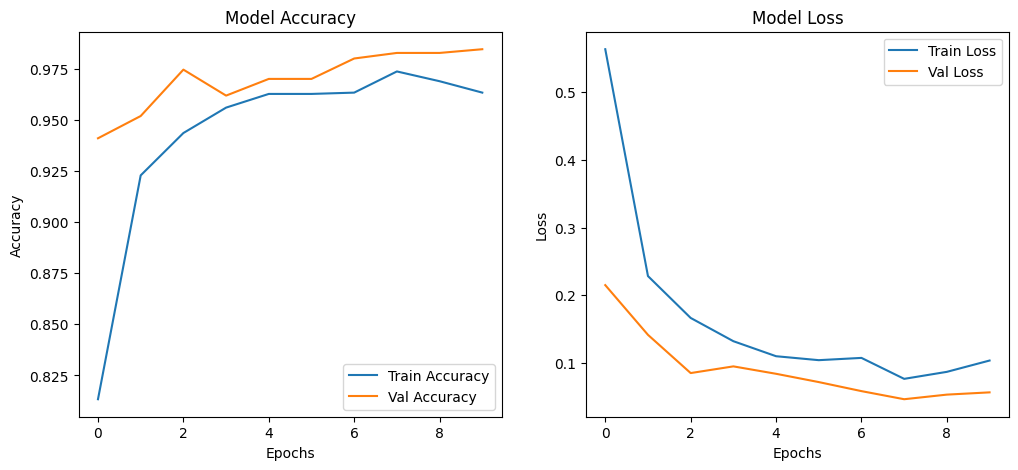

In [ ]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load saved model
model = load_model("my_InceptionV3_model.h5")

# Class names from training generator
class_names = list(train_gen.class_indices.keys())

# Image path to test
img_path = "/content/drive/MyDrive/Computer_Vision/data/test/fish sea_food shrimp/1GWZ1J7833HW.jpg"

# Preprocess
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: fish sea_food shrimp


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("my_InceptionV3_model.h5")

# Use the same class names from training
class_names = list(train_gen.class_indices.keys())

def predict_folder(folder_path):
    results = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Only consider image files
        if img_name.lower().endswith(('.jpg','.jpeg','.png','.bmp','.gif')):
            # Preprocess image
            img = image.load_img(img_path, target_size=(224,224))
            img_array = image.img_to_array(img)/255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            pred = model.predict(img_array, verbose=0)
            predicted_class = class_names[np.argmax(pred)]
            confidence = np.max(pred)

            results.append((img_name, predicted_class, round(confidence, 3)))

    return results

# Example usage
test_folder = "/content/drive/MyDrive/Computer_Vision/data/test/fish sea_food red_mullet"
predictions = predict_folder(test_folder)

# Print results
for name, label, conf in predictions:
    print(f"{name} --> {label} ({conf*100:.1f}%)")


9WW30RT3WBJ1.jpg --> fish sea_food red_mullet (99.6%)
CVDJ38WD0ZR9.jpg --> fish sea_food red_mullet (100.0%)
8ZJA5VEI7PKV.jpg --> fish sea_food red_mullet (100.0%)
PEH52ED02VNR.jpg --> fish sea_food red_mullet (100.0%)
BKTUHG0PMQYT.jpg --> fish sea_food red_mullet (100.0%)
P3DNSY4W2XD8.jpg --> fish sea_food red_mullet (99.9%)
CINUNCDTL45E.jpg --> fish sea_food red_mullet (99.8%)
RS1AZCTZGU9I.jpg --> fish sea_food red_mullet (99.9%)
HIVKUOWZ00IX.jpg --> fish sea_food red_mullet (100.0%)
79Q8R810T41C.jpg --> fish sea_food red_mullet (97.0%)
U2ON1U2QVNR3.jpg --> fish sea_food red_mullet (99.6%)
85GINDPEBD42.jpg --> fish sea_food red_mullet (99.7%)
0P2GBIIYQUY2.jpg --> fish sea_food red_mullet (99.7%)
G86BL8WJYXPB.jpg --> fish sea_food red_mullet (100.0%)
4F5KN3L0ZT73.jpg --> fish sea_food red_mullet (100.0%)
0WUMJVMKZDL5.jpg --> fish sea_food red_mullet (100.0%)
MLCPZGPSH1PW.jpg --> fish sea_food red_mullet (100.0%)
ON387F3PER8H.jpg --> fish sea_food red_mullet (100.0%)
FD7UNKLPYAMT.jpg -

**EfficientNetB0**

In [1]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = "/content/drive/MyDrive/Computer_Vision/data/train"
val_dir = "/content/drive/MyDrive/Computer_Vision/data/val"

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

# ----- Functional API -----
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

inputs = base_model.input
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(train_gen.num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)
# ---------------------------

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# ✅ Save as .h5
model.save("my_EfficientNetB0_model.h5")
print("✅ Saved as my_EfficientNetB0_model.h5")


Found 6275 images belonging to 11 classes.
Found 1102 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1972s 10s/step - accuracy: 0.1407 - loss: 2.3518 - val_accuracy: 0.1697 - val_loss: 2.3171
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 812s 4s/step - accuracy: 0.1778 - loss: 2.3044 - val_accuracy: 0.1697 - val_loss: 2.3138
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 823s 4s/step - accuracy: 0.1684 - loss: 2.3120 - val_accuracy: 0.1697 - val_loss: 2.3217
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 792s 4s/step - accuracy: 0.1778 - loss: 2.2987 - val_accuracy: 0.1697 - val_loss: 2.3106
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 823s 4s/step - accuracy: 0.1751 - loss: 2.3064 - val_accuracy: 0.1697 - val_loss: 2.3136
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 824s 4s/step - accuracy: 0.1800 - loss: 2.2957 - val_accuracy: 0.1697 - val_loss: 2.3132
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 751s 4s/step - accuracy: 0.1691 - loss: 2.3018 - val_accuracy: 0.1697 - val_loss: 2.3106
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 803s 4s/step - accuracy: 0.1684 - loss: 2.3076 - val_ac

✅ Saved as my_EfficientNetB0_model.h5


In [12]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

def load_fish_model():
    base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224,224,3))
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(5, activation='softmax')(x)  # adjust class count

    model = Model(inputs=base_model.input, outputs=outputs)
    model.load_weights("my_EfficientNetB0_model.h5")
    return model


In [2]:
import pickle

# After training each model
with open("history_EfficientNetB0.pkl", "wb") as f:
    pickle.dump(history.history, f)


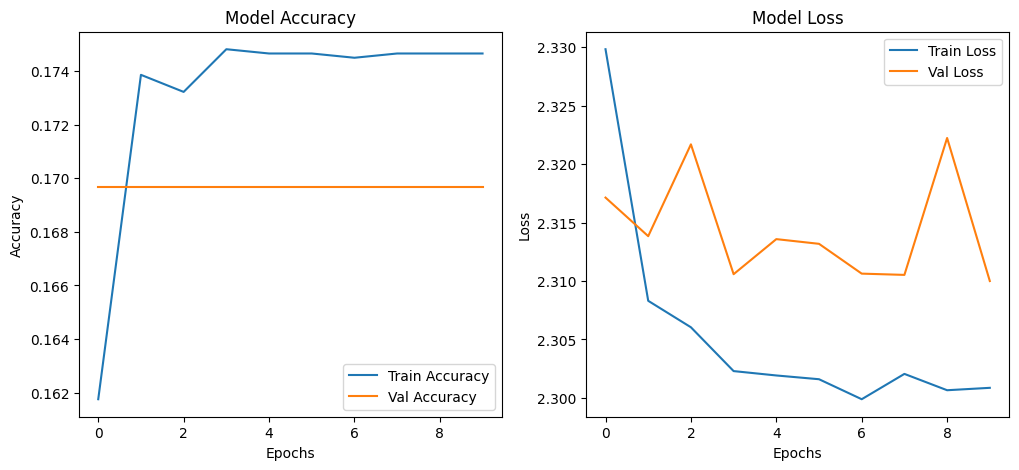

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load saved model
model = load_model("my_EfficientNetB0_model.h5")

# Class names from training generator
class_names = list(train_gen.class_indices.keys())

# Image path to test
img_path = "/content/drive/MyDrive/Computer_Vision/data/test/fish sea_food hourse_mackerel/015G960G2YZU.jpg"

# Preprocess
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: animal fish


In [6]:
import os

def predict_folder(folder_path):
    results = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        if img_name.lower().endswith(('.jpg','.jpeg','.png','.bmp','.gif')):
            img = image.load_img(img_path, target_size=(224,224))
            img_array = image.img_to_array(img)/255.0
            img_array = np.expand_dims(img_array, axis=0)

            pred = model.predict(img_array, verbose=0)
            predicted_class = class_names[np.argmax(pred)]
            confidence = np.max(pred)

            results.append((img_name, predicted_class, round(confidence, 3)))

    return results

# Usage
test_folder = "/content/drive/MyDrive/Computer_Vision/data/test/fish sea_food red_mullet"
predictions = predict_folder(test_folder)

for name, label, conf in predictions:
    print(f"{name} --> {label} ({conf*100:.1f}%)")


9WW30RT3WBJ1.jpg --> animal fish (15.8%)
CVDJ38WD0ZR9.jpg --> animal fish (15.8%)
8ZJA5VEI7PKV.jpg --> animal fish (15.7%)
PEH52ED02VNR.jpg --> animal fish (15.8%)
BKTUHG0PMQYT.jpg --> animal fish (15.8%)
P3DNSY4W2XD8.jpg --> animal fish (15.8%)
CINUNCDTL45E.jpg --> animal fish (15.7%)
RS1AZCTZGU9I.jpg --> animal fish (15.8%)
HIVKUOWZ00IX.jpg --> animal fish (15.8%)
79Q8R810T41C.jpg --> animal fish (15.8%)
U2ON1U2QVNR3.jpg --> animal fish (15.8%)
85GINDPEBD42.jpg --> animal fish (15.8%)
0P2GBIIYQUY2.jpg --> animal fish (15.7%)
G86BL8WJYXPB.jpg --> animal fish (15.8%)
4F5KN3L0ZT73.jpg --> animal fish (15.8%)
0WUMJVMKZDL5.jpg --> animal fish (15.8%)
MLCPZGPSH1PW.jpg --> animal fish (15.8%)
ON387F3PER8H.jpg --> animal fish (15.8%)
FD7UNKLPYAMT.jpg --> animal fish (15.7%)
BYNSN0UGWF5F.jpg --> animal fish (15.8%)
02IPBDUL6XGR.jpg --> animal fish (15.8%)
IAL43H01EV78.jpg --> animal fish (15.8%)
8OUVB3EYP8Y8.jpg --> animal fish (15.8%)
SKGNZH0OLM3J.jpg --> animal fish (15.8%)
JV9A4LS5D5UU.jpg

Found 3187 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.

🔍 Evaluating My_CNN_Model...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.98      0.88      0.93       298
   fish sea_food gilt_head_bream       0.95      0.96      0.95       305
   fish sea_food hourse_mackerel       0.99      0.92      0.96       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       0.94      0.97      0.96       273
          fish sea_food sea_bass       0.90      0.98      0.94       327
            fish sea_food shrimp       1.00      0.94      0.97       289
fish sea_food striped_red_mullet       0.83      0.97      0.89       293
             fish sea_food trout       0.99      0.93      0.96       292

                        accuracy                           0.95      3187
                       macro avg    

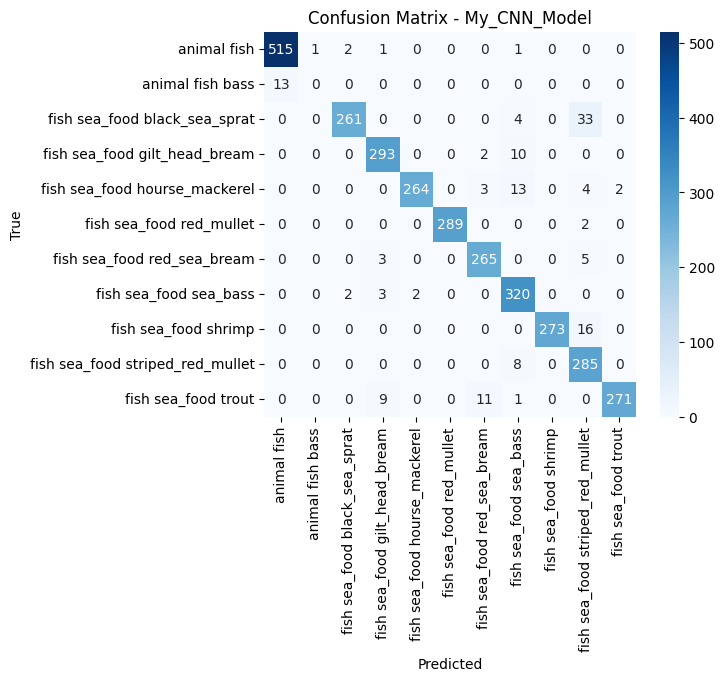


🔍 Evaluating MobileNet...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.99       520
                animal fish bass       1.00      0.23      0.38        13
   fish sea_food black_sea_sprat       1.00      0.93      0.96       298
   fish sea_food gilt_head_bream       1.00      0.93      0.96       305
   fish sea_food hourse_mackerel       1.00      0.95      0.97       286
        fish sea_food red_mullet       1.00      0.99      0.99       291
     fish sea_food red_sea_bream       0.94      1.00      0.97       273
          fish sea_food sea_bass       0.92      0.97      0.95       327
            fish sea_food shrimp       1.00      0.99      0.99       289
fish sea_food striped_red_mullet       0.91      1.00      0.95       293
             fish sea_food trout       0.98      0.99      0.99       292

                        accuracy                           0.97      3187
                       macro avg    

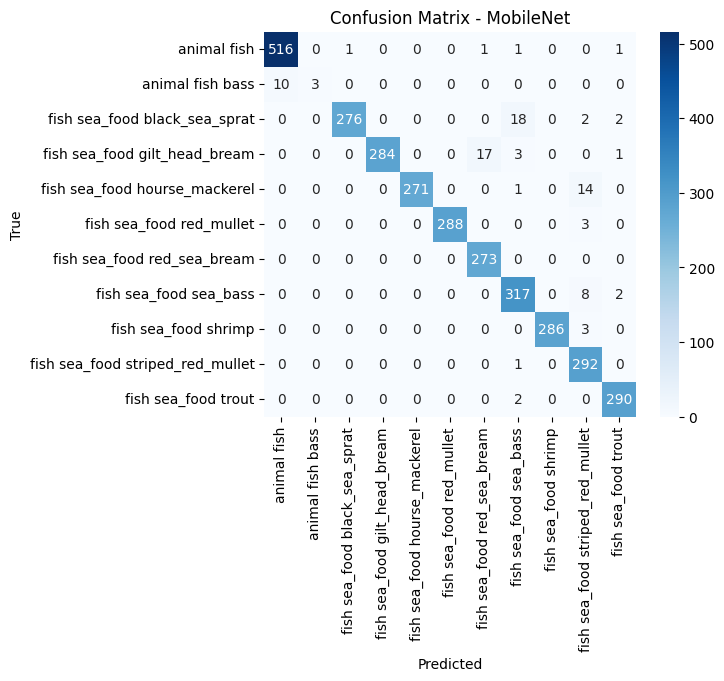


🔍 Evaluating VGG16...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.97      1.00      0.98       298
   fish sea_food gilt_head_bream       0.99      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       1.00      0.99      0.99       273
          fish sea_food sea_bass       1.00      0.99      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      0.98      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.99      3187
                       macro avg    

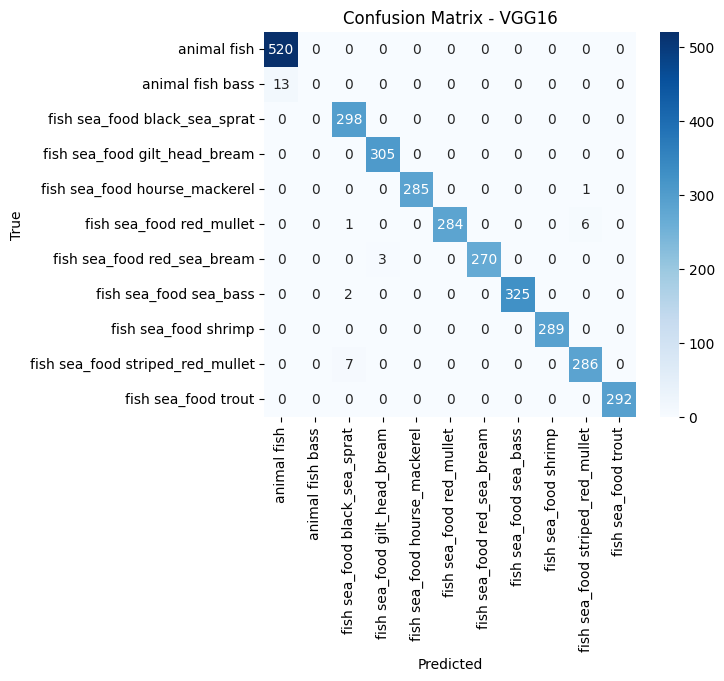


🔍 Evaluating ResNet50...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.24      0.73      0.37       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.50      0.03      0.06       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.28      0.34      0.31       286
        fish sea_food red_mullet       0.26      0.77      0.39       291
     fish sea_food red_sea_bream       0.80      0.03      0.06       273
          fish sea_food sea_bass       0.75      0.03      0.05       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.29      0.28      0.29       293
             fish sea_food trout       0.40      0.13      0.20       292

                        accuracy                           0.27      3187
                       macro avg    

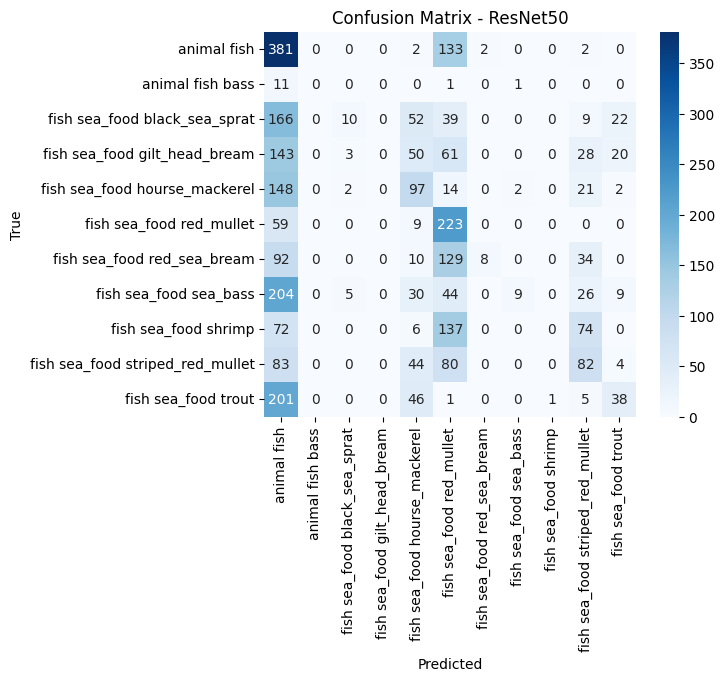


🔍 Evaluating InceptionV3...


                                  precision    recall  f1-score   support

                     animal fish       0.99      0.99      0.99       520
                animal fish bass       1.00      0.46      0.63        13
   fish sea_food black_sea_sprat       1.00      0.98      0.99       298
   fish sea_food gilt_head_bream       0.99      1.00      0.99       305
   fish sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish sea_food red_mullet       0.98      0.99      0.99       291
     fish sea_food red_sea_bream       0.99      0.99      0.99       273
          fish sea_food sea_bass       0.97      0.99      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      0.97      0.98       293
             fish sea_food trout       1.00      0.99      0.99       292

                        accuracy                           0.99      3187
                       macro avg    

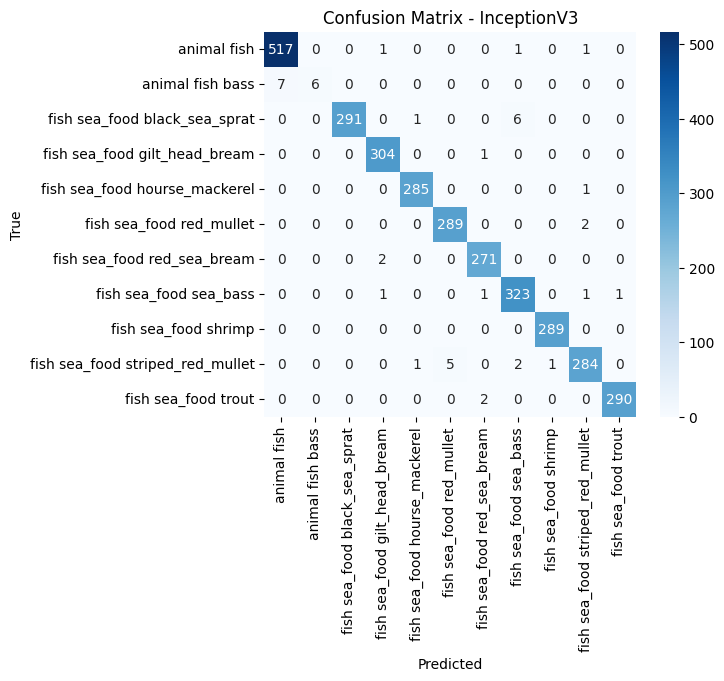


🔍 Evaluating EfficientNetB0...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy                           0.16      3187
                       macro avg    

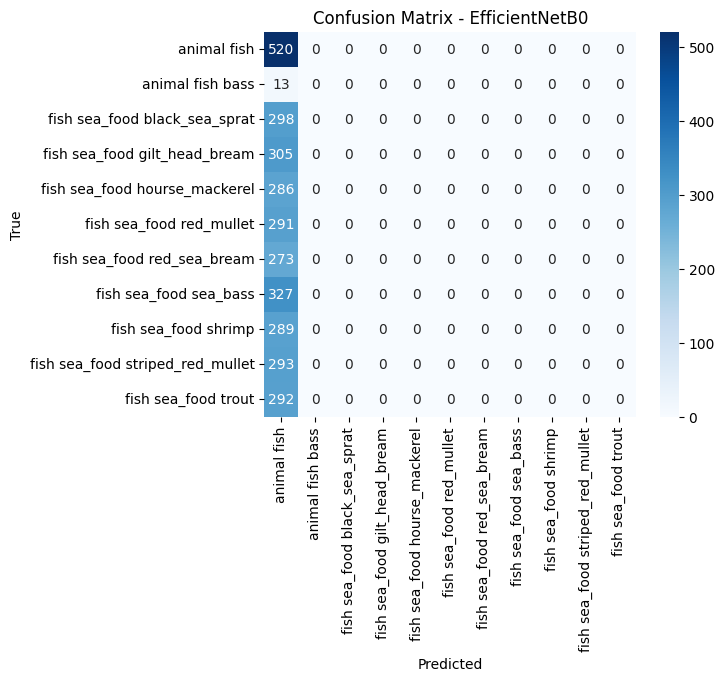


📋 Overall Metrics Comparison
            Model  Accuracy  Precision    Recall  F1-Score
0    My_CNN_Model  0.952620   0.952691  0.952620  0.951307
1       MobileNet  0.971447   0.973062  0.971447  0.970624
2           VGG16  0.989645   0.985777  0.989645  0.987642
3        ResNet50  0.266081   0.344340  0.266081  0.183073
4     InceptionV3  0.988077   0.988154  0.988077  0.987678
5  EfficientNetB0  0.163163   0.026622  0.163163  0.045775


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use the same generator for evaluation
test_dir = "/content/drive/MyDrive/Computer_Vision/data/test"  # or /content/test
batch_size = 32

# Data generator for models trained on 224x224 images
test_datagen_224 = ImageDataGenerator(rescale=1./255)
test_gen_224 = test_datagen_224.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Data generator for the CNN model trained on 64x64 images
test_datagen_64 = ImageDataGenerator(rescale=1./255)
test_gen_64 = test_datagen_64.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


class_names = list(test_gen_224.class_indices.keys()) # Use class names from one of the generators

# All saved model paths
model_paths = {
    "My_CNN_Model": "/content/drive/MyDrive/Model/my_cnn_model.h5",
    "MobileNet": "/content/drive/MyDrive/Model/my_MobileNet_model.h5",
    "VGG16": "/content/drive/MyDrive/Model/my_VGG16_model.h5",
    "ResNet50": "/content/drive/MyDrive/Model/my_ResNet50_model.h5",
    "InceptionV3": "/content/drive/MyDrive/Model/my_InceptionV3_model.h5",
    "EfficientNetB0": "/content/drive/MyDrive/Model/my_EfficientNetB0_model.h5"
}

# To collect results
metrics_summary = []

for model_name, path in model_paths.items():
    print(f"\n🔍 Evaluating {model_name}...")

    # Load model
    model = load_model(path)

    # Select the correct test generator based on the model
    if model_name == "My_CNN_Model":
        test_generator = test_gen_64
    else:
        test_generator = test_gen_224

    # Predict
    y_pred_probs = model.predict(test_generator, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes # Use classes from the corresponding generator

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Store
    metrics_summary.append([model_name, acc, prec, rec, f1])

# Summary Table
import pandas as pd
df_results = pd.DataFrame(metrics_summary, columns=['Model','Accuracy','Precision','Recall','F1-Score'])
print("\n📋 Overall Metrics Comparison")
print(df_results)